## Visualisation des données de consommation des métropoles françaises.

Sources :
1. https://odre.opendatasoft.com/explore/dataset/eco2mix-metropoles-tr/information/?disjunctive.libelle_metropole&disjunctive.nature
2. https://www.rte-france.com/eco2mix/telecharger-les-indicateurs

### Importations

In [1]:
import pandas as pd

####  Datasets

In [42]:
path_conso_lyon = '/Users/matthiasmolenat/repos/congestion/data/eCO2mix_RTE_Grand-Lyon_En-cours-TR.csv'
path_conso_st_etienne = '/Users/matthiasmolenat/repos/congestion/data/eCO2mix_RTE_Saint-Etienne_En-cours-TR.csv'

df_conso_st_etienne = pd.read_csv(path_conso_st_etienne, delimiter = ';')
df_conso_lyon = pd.read_csv(path_conso_lyon, delimiter = ';')

df_conso_lyon.head()

/var/folders/73/pr8hlbx91tg9lbcjsv3sshsm0000gn/T/ipykernel_4561/3134361580.py:4: DtypeWarning: Columns (3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_conso_st_etienne = pd.read_csv(path_conso_st_etienne, delimiter = ';')
/var/folders/73/pr8hlbx91tg9lbcjsv3sshsm0000gn/T/ipykernel_4561/3134361580.py:5: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_conso_lyon = pd.read_csv(path_conso_lyon, delimiter = ';')


,Date,Heures,Consommation,Production,Echanges physiques,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2017-04-19,00:00,1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-19,00:15,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-19,00:30,974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-19,00:45,952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-19,01:00,932,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_conso_lyon['Date'] = pd.to_datetime(df_conso_lyon['Date'])

df_conso_lyon['year'] = df_conso_lyon['Date'].dt.year
df_conso_lyon['month'] = df_conso_lyon['Date'].dt.month
df_conso_lyon['day'] = df_conso_lyon['Date'].dt.day



In [44]:
df_conso_lyon.head()

,Date,Heures,Consommation,Production,Echanges physiques,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,year,month,day
0,2017-04-19,00:00,1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,4,19
1,2017-04-19,00:15,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,4,19
2,2017-04-19,00:30,974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,4,19
3,2017-04-19,00:45,952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,4,19
4,2017-04-19,01:00,932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,4,19


#### Conso de la métropole de Lyon 2023

In [45]:
df_conso_Lyon_2023 = df_conso_lyon[ df_conso_lyon['year'] == 2023]
df_conso_Lyon_2023.head()

,Date,Heures,Consommation,Production,Echanges physiques,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,year,month,day
199968,2023-01-01,00:00,846,ND,679,-,-,-,-,NaN,2023,1,1
199969,2023-01-01,00:15,834,ND,667,-,-,-,-,NaN,2023,1,1
199970,2023-01-01,00:30,825,ND,657,-,-,-,-,NaN,2023,1,1
199971,2023-01-01,00:45,797,ND,630,-,-,-,-,NaN,2023,1,1
199972,2023-01-01,01:00,790,ND,622,-,-,-,-,NaN,2023,1,1


<Axes: xlabel='Heures'>

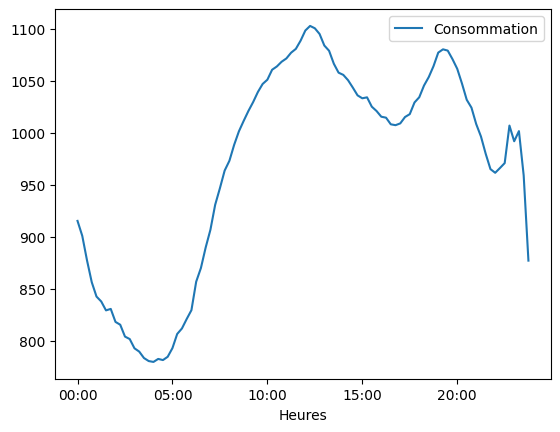

In [46]:
df_conso_Lyon_2023.dropna()
df_conso_Lyon_2023 = df_conso_Lyon_2023[df_conso_Lyon_2023['Consommation']!= 'ND']
df_conso_Lyon_2023['Consommation'] = df_conso_Lyon_2023['Consommation'].astype('int')
df_conso_lyon_2023_mean = df_conso_Lyon_2023[['Heures','Consommation']].groupby(['Heures']).mean()

df_conso_lyon_2023_mean.plot()